In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np



In [2]:
# Step 1: Load the datasets
normal_bearing_path = 'Normal_Bearing.csv'
inner_race_fault_path = 'inner_race_fault.csv'
outer_race_fault_path = 'outer_race_fault_test_2.csv'

In [3]:
normal_bearing_data = pd.read_csv(normal_bearing_path)
inner_race_fault_data = pd.read_csv(inner_race_fault_path)
outer_race_fault_data = pd.read_csv(outer_race_fault_path)

In [4]:
# Step 2: Label the datasets
normal_bearing_data['Fault'] = 0  # Normal
inner_race_fault_data['Fault'] = 1  # Inner Race Fault
outer_race_fault_data['Fault'] = 2  # Outer Race Fault


In [5]:
# Step 3: Combine all datasets
combined_data = pd.concat([normal_bearing_data, inner_race_fault_data, outer_race_fault_data], axis=0).reset_index(drop=True)


In [6]:
# Step 4: Separate features and labels
X = combined_data.drop(columns=['Fault'])
y = combined_data['Fault']


In [7]:
# Step 5: Normalize the features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)


In [8]:
# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42, stratify=y)


In [9]:
# Step 7: Reshape data for CNN input (samples, features, channels)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [13]:
# Step 8: Build the CNN model
model = Sequential([
    Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=1),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=1),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # Multi-class classification (3 classes)
])


In [14]:
# Step 9: Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [15]:
# Step 10: Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32)



Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5121 - loss: 1.0482 - val_accuracy: 0.6632 - val_loss: 0.8461
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7127 - loss: 0.7937 - val_accuracy: 0.7182 - val_loss: 0.5548
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7683 - loss: 0.5445 - val_accuracy: 0.8213 - val_loss: 0.3980
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8633 - loss: 0.3942 - val_accuracy: 0.9141 - val_loss: 0.2573
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9241 - loss: 0.2370 - val_accuracy: 0.9381 - val_loss: 0.2001
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9218 - loss: 0.2128 - val_accuracy: 0.9622 - val_loss: 0.1513
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9361 - loss: 0.1806 - val_accuracy: 0.9622 - val_loss: 0.1269
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9292 - loss: 0.1727 - val_accuracy: 0.9622 - val_loss

In [16]:
# Step 11: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9704 - loss: 0.0594 
Test Accuracy: 96.91%


In [17]:
# Step 12: Generate classification report and confusion matrix
y_pred = np.argmax(model.predict(X_test), axis=1)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       154
           1       0.92      1.00      0.96        93
           2       1.00      0.98      0.99        44

    accuracy                           0.97       291
   macro avg       0.97      0.98      0.97       291
weighted avg       0.97      0.97      0.97       291

Confusion Matrix:
 [[146   8   0]
 [  0  93   0]
 [  1   0  43]]


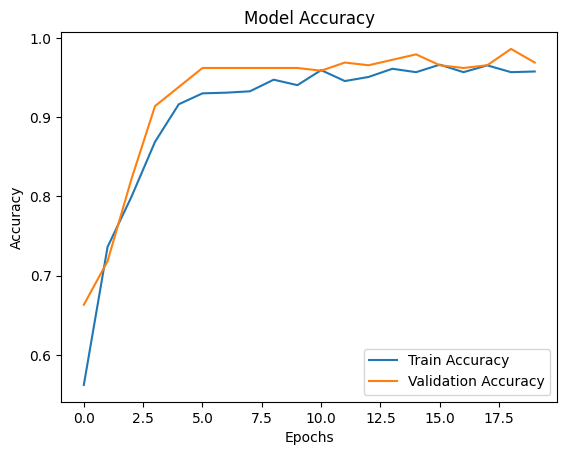

In [18]:
# Step 13: Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


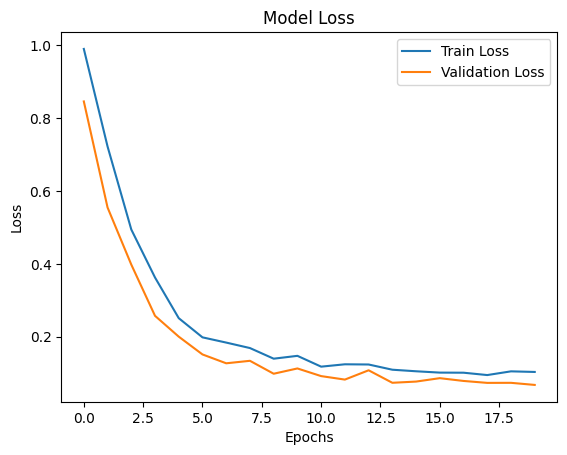

In [19]:
# Step 14: Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
print(test_loss)


0.06755603849887848
